# **Effects of Population on Crimes**

작성자: 김민채

## **프로젝트 목표**
2009년부터 2018년까지 10년 간 집계된 미국의 **도시 인구 수**와 **범죄**의 회귀분석 프로젝트<br>
### What impact does Population have on crimes?<br>
범죄 발생에 인구 수는 영향력을 미칠까?<br>
<br>
###정부로부터 통고가 날아왔다.<br>
**".. 더 이상 형사 범죄에 전보다 많은 예산을 집행할 수 없습니다.<br>
이렇게나 많은 요원들과 부서가 존재함에도 어째서 범죄 발생 현황은 크게 나아지질 않는 것인지<br>
본 부서의 범죄 예방 및 검거 능력에 많은 의구심이 듭니다.<br>
올해는 작년에 준하여 필요 최소한의 예산만이 집행됩니다.<br>
주어진 자원 안에서 본 부서의 존재 이유를 크게 느낄 수 있는 한 해가 되기를 기대합니다."**<br>  
<br>
### 줄어든 예산 속에서 형사 범죄 예방 및 필요 요원 배치를 위해 오직 인구 수만으로 범죄를 예측하라!
<br>

## **프로젝트 가설**
**주제**:<br>
도시 인구 수를 통한 범죄 발생 예측 시스템 도출<br>
<br> 

**귀무가설**:<br>
인구 수와 형법 범죄 발생 건 수는 인과관계가 없다.<br>
<br>


**가설 검증 방향**:<br>
1. 미국의 주(State) 별 인구 10만 명당 범죄 발생률 계산
- 인구 10만 명당 범죄 발생률 평균을 구해 범죄 발생 예측 정책 필요성 피력
 - 각 주의 형법 범죄율은 인구 10만 명당 형법 범죄 발생건수를 나타낸다.
 - 형법 범죄율 계산 방식 = (형법 범죄 발생건수 ÷ 총인구) × 100,000<br>
 <br> 
2. 인구 수와 범죄 발생 간 상관관계 파악
- scatter plot(산점도) 및 피어슨 상관계수 적용
 - violent crime의 경우
 - property crime의 경우<br>
 <br>

3. 인구 수에 따른 범죄 발생률 인과관계 여부 분석
- 회귀분석(regression)
 - statsmodel의 ols 적용
  - 변수의 정규성: KDE(Kernel Density Estimation)
  - 변수의 선형 상관성: regplot  
  - 변수의 독립성: DW 검정(Durbin-Watson)
- 인구 수에 가장 큰 영향을 받는 형법 범죄는 무엇일까?<br>
<br>
4. 2019년 인구 수를 통한 형법 범죄 발생 건수 예측
- sklearn의 LinearRegression 적용<br>
- df_test
 <br>
5. 정리<br>






## **환경설정**

In [ ]:
### load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### auto resize
%matplotlib inline

In [ ]:
### pandas display option float format
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# ### install pandas profiling for description of df
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport

In [ ]:
### upload csv file method1
from google.colab import files
uploaded = files.upload()

Saving estimated_crimes_1979_2019.csv to estimated_crimes_1979_2019.csv


## **데이터셋**<br>
**estimated_crimes_1979_2019.csv**<br>
This dataset contains estimated data at the state and national level and was derived from the Summary Reporting System (SRS).<br>
These data reflect the estimates the FBI has traditionally included in its annual publications.<br>
the FBI's estimated crime totals for the nation and all 50 states, 1979 to current year available.<br>
[Federal Bureau of Investigation
Crime Data Explorer](https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/estimated_crimes_1979_2019.csv)<br>
<br>
## **특성**                    
- year : 년도
- state_abbr : 미국 주 명 약자 
- state_name : 미국 주 명                                     
- Population : 미국 주 인구 수                
- violent_crime_total : 강력범죄 총계      
- homicide : 살인죄
- rape_legacy : 2013년 법 개정 전 강간죄
- rape_revised : 2013년 법 개정 후 강간죄	
- robbery : 협박 혹은 폭력을 사용한 강도죄
- aggravated_assault : 가중 폭행죄                                       
- property_crime : 재산범죄 총계        
- burglary : 주거 침입 절도죄
- larceny : 절도죄               
- motor_vehicle_theft : 차량 절도죄        
- caveats : 주의사항 

In [ ]:
### load csv file

df = pd.read_csv('estimated_crimes_1979_2019.csv')

In [ ]:
df.head()

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.00,nan,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.00,nan,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.00,nan,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.00,nan,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.00,nan,4305,8884,177977,48916,116976,12085,NaN


In [ ]:
df.shape

(2116, 15)

In [ ]:
# ### df description through by pandas_profile

# profile = ProfileReport(df)
# profile.to_file('estimated_crimes_1979_2019_report.html')

In [ ]:
df.isnull().sum()

year                      0
state_abbr               41
state_name               41
population                0
violent_crime             0
homicide                  0
rape_legacy             156
rape_revised           1752
robbery                   0
aggravated_assault        0
property_crime            0
burglary                  0
larceny                   0
motor_vehicle_theft       0
caveats                2045
dtype: int64

In [ ]:
df = df[df['state_name'].notnull()]

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

year                   0
state_abbr             0
state_name             0
population             0
violent_crime          0
homicide               0
rape_legacy            0
rape_revised           0
robbery                0
aggravated_assault     0
property_crime         0
burglary               0
larceny                0
motor_vehicle_theft    0
caveats                0
dtype: int64

In [ ]:
### add rape_legacy to rape_revised

df['rape'] = df['rape_legacy'] + df['rape_revised']

In [ ]:
df_train = df.loc[(2008 < df['year']) &(df['year'] < 2019)]

In [ ]:
df_test = df.loc[df['year'] == 2019]

기존 데이터는 2019년도 데이터셋과 2009년부터 2018년 간의 데이터셋으로 크게 이원화 되었다.<br>
2009년부터 2018년까지의 데이터를 통해 발생한 범죄와 측정된 인구 수의 회귀분석을 거치고<br>
인과관계가 밝혀질 시 2019년의 인구 수로 범죄 발생 건수를 예측하기 위해서이다.

In [ ]:
### remove unnecessary features:

df = df.drop(['year', 'state_abbr', 'violent_crime', 'rape_legacy', 'rape_revised', 'property_crime', 'caveats'], axis = 1)

데이터셋에서 삭제된 특성은 'year', 'state_abbr', 'violent_crime', 'rape_legacy', 'rape_revised', 'property_crime', 'caveats'이다.<br>
'state_name'을 통해 해당 주의 명칭을 확인할 수 있어 명칭 약어를 삭제했다.<br>
이와 더불어 'year', 'violent_crime', 'rape_legacy', 'rape_revised' 및 'property_crime'을 함께 삭제했다.<br>
본 프로젝트는 년도 변화, 포괄적인 범죄 총계의 영향 혹은 강간죄 개정 전후의 차이를 분석하기 보다<br>
인구 수에 따른 각 범죄 발생의 인과관계를 밝혀보는 것에 있기 때문이다.<br>

In [ ]:
df_train = df_train.groupby(by = ['state_name']).mean()
df_train = df_train.reset_index()

df_train 데이터는 총 10년 간 발발한 범죄 통계를 각 주에 따라 재집계한 것이다.<br>
따라서 해당 값의 평균을 구해 10년 간 발생한 형법 범죄율을 살펴보고자 한다.


In [ ]:
df_test = df_test.groupby(by = ['state_name']).sum()
df_test = df_test.reset_index()

한편 df_test 데이터는 2019년 1년 간 발생한 범죄 통계를 나타내고 있을 뿐이므로 각 주에 따라 합산하여 처리하였다.<br>


In [ ]:
### rearrange columns

df_train = df_train[['state_name',	'population',	'homicide',	'rape',	'robbery',	'aggravated_assault',	
                      'burglary',	'larceny',	'motor_vehicle_theft']]


df_test = df_test[['state_name',	'population',	'homicide',	'rape',	'robbery',	'aggravated_assault',	
                    'burglary',	'larceny',	'motor_vehicle_theft']]

In [ ]:
df_train.head()

,state_name,population,homicide,rape,robbery,aggravated_assault,burglary,larceny,motor_vehicle_theft
0,Alabama,4827295.40,341.70,2327.30,4798.10,15388.00,40174.20,106237.00,11123.50
1,Alaska,729524.70,40.80,1061.20,716.50,3585.90,3429.00,16041.00,2300.30
2,Arizona,6732428.70,370.90,3876.60,6991.50,19076.90,45028.50,152908.60,19467.90
3,Arkansas,2960386.20,185.70,2262.20,2174.30,11105.40,27764.40,67803.80,6204.30
4,California,38435871.00,1826.30,14651.70,55394.60,97693.60,209665.60,621951.00,162028.40


In [ ]:
df_train.shape

(51, 9)

In [ ]:
df_test.head()

,state_name,population,homicide,rape,robbery,aggravated_assault,burglary,larceny,motor_vehicle_theft
0,Alabama,4903185,358,2068.00,3941,18679,26079,92477,12577
1,Alaska,731545,69,1088.00,826,4360,3563,15114,2617
2,Arizona,7278717,365,3662.00,6410,22704,28699,130788,18151
3,Arkansas,3017804,242,2331.00,1557,13513,18095,60735,7420
4,California,39512223,1690,14799.00,52301,105541,152555,626802,141757


In [ ]:
df_test.shape

(51, 9)

### **범죄 유형에 따른 데이터셋 추출(violent_crime / property_crime)**

#### **violent_crime** 

In [ ]:
### rearrange df_train on violent crime

violent_crime = df_train[['state_name',	'population',	'homicide',	'rape',	'robbery',	'aggravated_assault']]

In [ ]:
violent_crime.head()

,state_name,population,homicide,rape,robbery,aggravated_assault
0,Alabama,4827295.40,341.70,2327.30,4798.10,15388.00
1,Alaska,729524.70,40.80,1061.20,716.50,3585.90
2,Arizona,6732428.70,370.90,3876.60,6991.50,19076.90
3,Arkansas,2960386.20,185.70,2262.20,2174.30,11105.40
4,California,38435871.00,1826.30,14651.70,55394.60,97693.60


In [ ]:
violent_crime.shape

(51, 6)

#### **property_crime**

In [ ]:
### rearrange df_train on property crime

property_crime = df_train[['state_name',	'population', 'burglary',	'larceny',	'motor_vehicle_theft']]

In [ ]:
property_crime.head()

,state_name,population,burglary,larceny,motor_vehicle_theft
0,Alabama,4827295.40,40174.20,106237.00,11123.50
1,Alaska,729524.70,3429.00,16041.00,2300.30
2,Arizona,6732428.70,45028.50,152908.60,19467.90
3,Arkansas,2960386.20,27764.40,67803.80,6204.30
4,California,38435871.00,209665.60,621951.00,162028.40


In [ ]:
property_crime.shape

(51, 5)

## **가설검증**

### **1. 미국의 주(State) 별 범죄율 계산**
 - 각 주의 형법 범죄율은 인구 10만명당 형법 범죄 발생건수를 나타낸다.
 - 형법 범죄율 계산 방식 = (형법 범죄 발생건수 ÷ 총인구) × 100,000
 - 형법 범죄율의 값이 클수록 해당 범죄 발생이 높다는 것을 의미한다.
 - 살인의 경우 범죄 발생률이 5보다 적다면 치안 면에서 안전하다는 것을 가리킨다.

앞서 인구 10만 명이 넘어서는 데이터에서는 각 범죄 별 발생 건수를 보아도 인구 대비 해당 범죄 발생의 심각성이 도드라질 수 없었다.<br>
상대적으로 많은 인구 수 대비 범죄의 수는 비교적 적을 수밖에 없기 때문이다.<br>
따라서 인구 10만 명을 기준으로 범죄 발생률을 계산하여 살펴보고자 한다.

#### **violent_crime**

In [ ]:
violent_proba = violent_crime.copy()

violent_proba['homicide_rate'] = (violent_proba['homicide'] / violent_proba['population']) * 100000
violent_proba['rape_rate'] = (violent_proba['rape'] / violent_proba['population']) * 100000
violent_proba['robbery_rate'] = (violent_proba['robbery'] / violent_proba['population']) * 100000
violent_proba['aggravated_assault_rate'] = (violent_proba['aggravated_assault'] / violent_proba['population']) * 100000

In [ ]:
violent_proba = violent_proba[['state_name', 'homicide_rate', 'rape_rate', 'robbery_rate', 'aggravated_assault_rate']]

In [ ]:
violent_proba

,state_name,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate
0,Alabama,7.08,48.21,99.40,318.77
1,Alaska,5.59,145.46,98.21,491.54
2,Arizona,5.51,57.58,103.85,283.36
3,Arkansas,6.27,76.42,73.45,375.13
4,California,4.75,38.12,144.12,254.17
5,Colorado,3.22,74.69,63.59,210.61
6,Connecticut,2.94,28.68,90.34,137.74
7,Delaware,5.42,47.96,146.61,336.26
8,District of Columbia,19.25,75.87,563.45,571.64
9,Florida,5.17,44.13,114.98,320.46


In [ ]:
violent_proba.shape

(51, 5)

In [ ]:
violent_proba.describe()

,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate
count,51.00,51.00,51.00,51.00
mean,4.73,52.48,92.93,244.22
std,2.93,19.58,79.10,112.23
min,1.20,18.26,12.26,64.51
25%,2.67,41.85,56.30,156.27
50%,4.68,48.21,89.35,229.04
75%,6.03,62.00,115.27,308.45
max,19.25,145.46,563.45,571.64


강력범죄 중 살인죄의 경우 인구 10만 명당 약 5.0건의 범죄 발생률이 나타났다.<br>
한편 강간죄는 인구 10만 명당 52건의 범죄가 발생하고 강도죄의 경우 인구 10만 명당 93건의 범죄가 발발하는 편이었다.<br>
살인죄에 비해 발생비율이 10배 이상 높았다.<br>
그 중 가장 많은 범죄율을 기록한 건 가중 폭행죄였다.<br>
다른 강력범죄보다 적게는 약 3배부터 많게는 49배나 많은 수치였다.<br>
대한민국의 경우 살인죄는 약 2.0건, 강간죄는 12건, 강도죄는 약 5건, 폭행죄는 127건인 것으로 보아 미국은 범죄 발생률이 최소 두 배 이상 높은 편이었다. 




#### **property_crime**

In [ ]:
property_proba = property_crime.copy()

property_proba['burglary_rate'] = (property_proba['burglary'] / property_proba['population']) * 100000
property_proba['larceny_rate'] = (property_proba['larceny'] / property_proba['population']) * 100000
property_proba['motor_vehicle_theft_rate'] = (property_proba['motor_vehicle_theft'] / property_proba['population']) * 100000

In [ ]:
property_proba = property_proba[['state_name',	'burglary_rate', 'larceny_rate', 'motor_vehicle_theft_rate']]

In [ ]:
property_proba

,state_name,burglary_rate,larceny_rate,motor_vehicle_theft_rate
0,Alabama,832.23,2200.76,230.43
1,Alaska,470.03,2198.83,315.31
2,Arizona,668.83,2271.22,289.17
3,Arkansas,937.86,2290.37,209.58
4,California,545.49,1618.15,421.56
5,Colorado,459.71,1919.65,284.47
6,Connecticut,343.18,1449.83,189.28
7,Delaware,629.69,2193.57,161.45
8,District of Columbia,475.75,3668.81,569.14
9,Florida,657.93,2167.43,205.46


In [ ]:
property_proba.shape

(51, 4)

In [ ]:
property_proba.describe()

,burglary_rate,larceny_rate,motor_vehicle_theft_rate
count,51.00,51.00,51.00
mean,555.36,1893.30,218.01
std,187.38,431.55,100.97
min,262.77,1289.77,53.36
25%,401.70,1553.86,155.38
50%,502.99,1857.90,205.46
75%,700.83,2199.79,280.78
max,937.86,3668.81,569.14


재산범죄 중 주거 침입 절도죄의 경우 인구 10만 명당 약 555건의 범죄 발생률을 보였다.<br>
그에 비해 절도죄는 인구 10만 명당 1893건의 범죄가 발생하고 차량 절도죄의 경우 인구 10만 명당 218건의 범죄가 발발하는 편이었다.<br>
상대적으로 주거에 침입하거나 차량을 절도하는 것에 쉬운 절도죄의 범죄율이 가장 높았다.<br>
대한민국의 경우 주거 침입 절도죄는 약 72건, 절도죄는 592건, 차량 절도죄는 12건인 것에 비해 굉장히 높은 수치였다.<br>




### **2. 인구 수와 범죄 발생 간 상관관계 파악**
- scatter plot(산점도) 및 피어슨 상관계수 검증
 - violent crime의 경우
 - property crime의 경우
 

#### **violent_crime**

인구 수가 많아질수록 강력범죄는 증가하는 경향을 보일까?<br>
이를 알아보기 위해 두 변수의 산점도를 그려보았다.

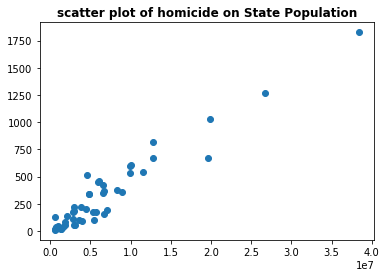

In [ ]:
### scatter plot

plt.scatter(x = violent_crime['population'], y = violent_crime['homicide'])
plt.title('scatter plot of homicide on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

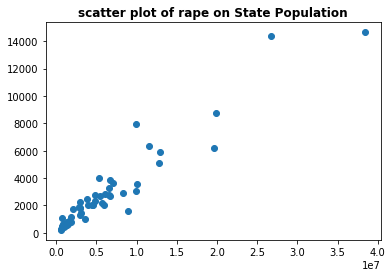

In [ ]:
### scatter plot

plt.scatter(x = violent_crime['population'], y = violent_crime['rape'])
plt.title('scatter plot of rape on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

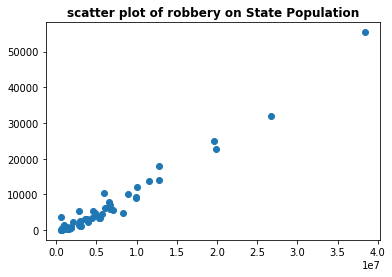

In [ ]:
### scatter plot

plt.scatter(x = violent_crime['population'], y = violent_crime['robbery'])
plt.title('scatter plot of robbery on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

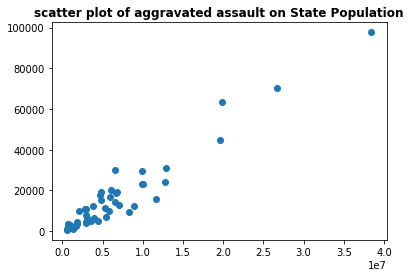

In [ ]:
### scatter plot

plt.scatter(x = violent_crime['population'], y = violent_crime['aggravated_assault'])
plt.title('scatter plot of aggravated assault on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

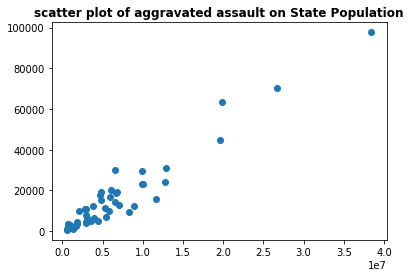

In [ ]:
### scatter plot

plt.scatter(x = violent_crime['population'], y = violent_crime['aggravated_assault'])
plt.title('scatter plot of aggravated assault on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

상관관계의 정도를 파악하기 위해 scipy.stats의 pearson correlation coefficient를 계산하겠다.

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 살인죄 발생은 상관관계가 없다.
### H1 = 인구 수와 살인죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['homicide'])

(0.9594109313767651, 1.364542032668328e-28)

pearson을 통해 상관계수 및 p값을 계산해본 결과<br>
상관계수는 0.95, p값은 0.05보다 현저히 작은 것을 확인할 수 있다.<br>
따라서 인구 수와 살인죄는 통계적으로 유의미하게 매우 강한 상관관계를 보였다.

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 강간죄 발생은 상관관계가 없다.
### H1 = 인구 수와 강간죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['rape'])

(0.9483939875984352, 4.314486505531023e-26)

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 강도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 강도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['robbery'])

(0.9821402930978238, 3.257275177120936e-37)

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 가중 폭행죄 발생은 상관관계가 없다.
### H1 = 인구 수와 가중 폭행죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['aggravated_assault'])

(0.9619430534261982, 2.8989502334438946e-29)

다음은 직관적으로 강력범죄의 각 유형과 인구 수의 상관관계를 시각화하여 살펴보고자 한다.

In [ ]:
violent_corr = violent_crime.corr()
violent_corr

,population,homicide,rape,robbery,aggravated_assault
population,1.00,0.96,0.95,0.98,0.96
homicide,0.96,1.00,0.93,0.96,0.96
rape,0.95,0.93,1.00,0.91,0.94
robbery,0.98,0.96,0.91,1.00,0.96
aggravated_assault,0.96,0.96,0.94,0.96,1.00


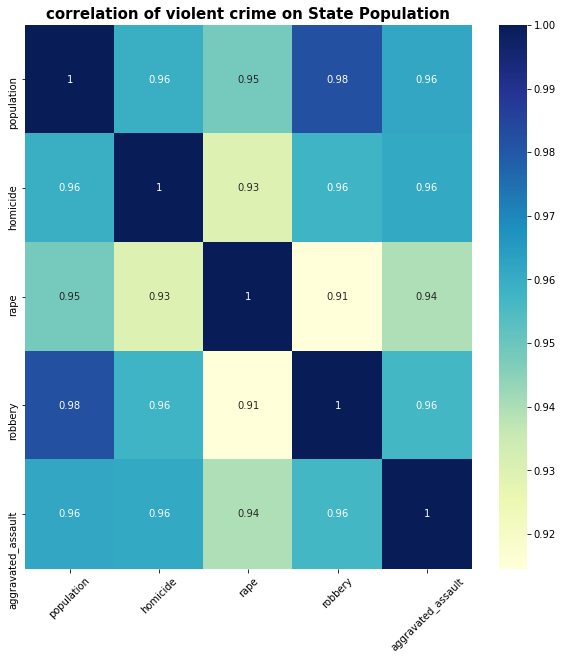

In [ ]:
### correlation diagram on violent crime

plt.figure(figsize = (10, 10))
violent_corr = sns.heatmap(violent_corr, annot = True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.title('correlation of violent crime on State Population', fontsize = 15, fontweight = 'bold')
plt.show()

#### **property_crime**

인구 수가 많아질수록 재산범죄도 증가하는 경향을 보일까?<br>
이를 알아보기 위해 두 변수의 산점도를 그려보았다.

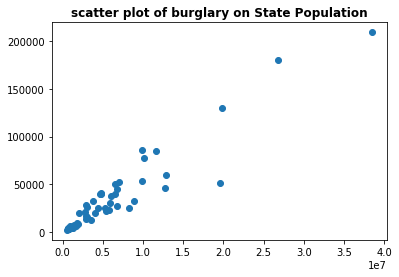

In [ ]:
### scatter plot

plt.scatter(x = property_crime['population'], y = property_crime['burglary'])
plt.title('scatter plot of burglary on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

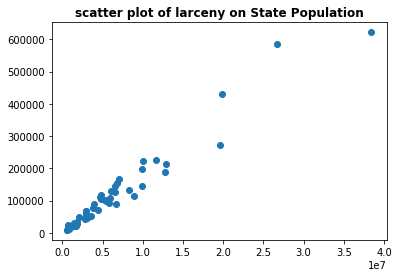

In [ ]:
### scatter plot

plt.scatter(x = property_crime['population'], y = property_crime['larceny'])
plt.title('scatter plot of larceny on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


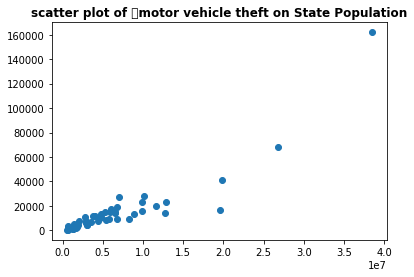

In [ ]:
### scatter plot

plt.scatter(x = property_crime['population'], y = property_crime['motor_vehicle_theft'])
plt.title('scatter plot of 	motor vehicle theft on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

상관관계의 정도를 파악하기 위해 scipy.stats의 pearson correlation coefficient를 계산하겠다.

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 주거 침입 절도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 주거 침입 절도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(property_crime['population'], property_crime['burglary'])

(0.941588472598317, 8.29369802742667e-25)

pearson을 통해 상관계수 및 p값을 계산해본 결과<br>
상관계수는 0.94, p값은 0.05보다 현저히 작은 것을 확인할 수 있다.<br>
따라서 인구 수와 주거 침입 절도죄는 통계적으로 유의미하게 매우 강한 상관관계를 보였다.

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 절도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 절도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(property_crime['population'], property_crime['larceny'])

(0.9731589985928981, 6.353413735386285e-33)

In [ ]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 차량 절도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 차량 절도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(property_crime['population'], property_crime['motor_vehicle_theft'])

(0.8951611177255255, 8.049454301253043e-19)

다음은 직관적으로 강력범죄의 각 유형과 인구 수의 상관관계를 시각화하여 살펴보고자 한다.

In [ ]:
property_corr = property_crime.corr()
property_corr

,population,burglary,larceny,motor_vehicle_theft
population,1.00,0.94,0.97,0.90
burglary,0.94,1.00,0.98,0.89
larceny,0.97,0.98,1.00,0.87
motor_vehicle_theft,0.90,0.89,0.87,1.00


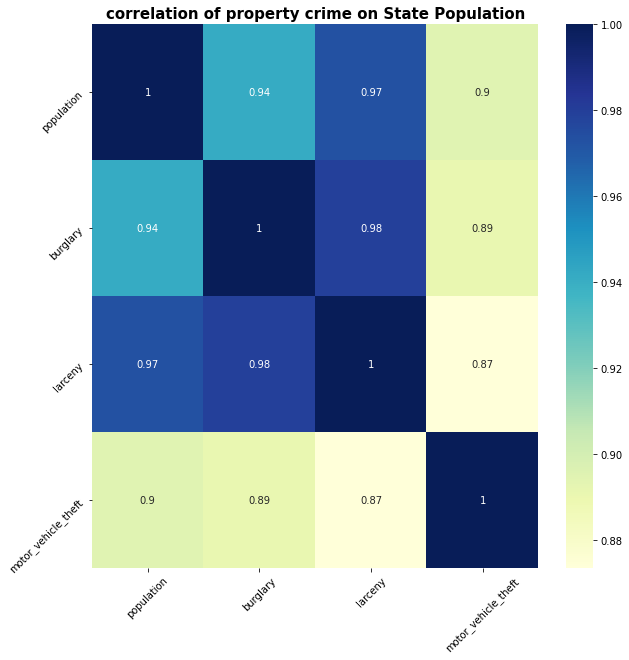

In [ ]:
### correlation diagram on property crime

plt.figure(figsize = (10, 10))
property_corr = sns.heatmap(property_corr, annot = True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('correlation of property crime on State Population', fontsize = 15, fontweight = 'bold')
plt.show()

인구 수와 범죄 발생은 강한 양의 상관관계가 존재했다.<br>
다시 말해 인구 수가 많아질수록 범죄의 발생 역시 증가하는 추세를 보였다는 것이다.<br>
그러나 인구 수와 범죄 발생 간 어느 변수가 다른 변수의 원인이 되는 것인지는 또 다른 문제다.<br>
과연 인구 수는 범죄 발생에 있어 상관관계를 넘어 인과관계를 가질까?

### **3. 인구 수에 따른 범죄 발생률 인과관계 여부 분석**
- 회귀분석(regression)<br>
 - statsmodel의 ols 적용
 - 변수의 정규성: KDE(Kernel Density Estimation)
 - 변수의 선형 상관성: regplot  
 - 변수의 독립성: DW 검정(Durbin-Watson)
 
- 인구 수에 가장 큰 영향을 받는 형법 범죄는 무엇일까? 


#### **violent_crime**

강력범죄의 회귀분석에 앞서 10년 간 집계된 살인죄, 강간죄, 강도죄 및 가중 폭행죄의 데이터 분포를 확인하고자 한다.<br>


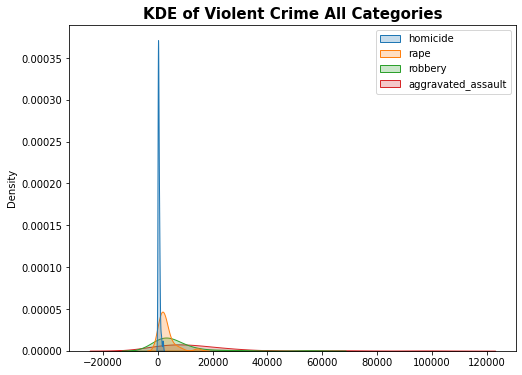

In [ ]:
### KDE of Violent Crime All Categories

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime[['homicide',	'rape',	'robbery',	'aggravated_assault']], shade = True)

plt.title('KDE of Violent Crime All Categories', fontsize = 15, fontweight = 'bold')
plt.show()

In [ ]:
violent_crime.describe()

,population,homicide,rape,robbery,aggravated_assault
count,51.00,51.00,51.00,51.00,51.00
mean,6222248.67,304.07,2880.50,6702.81,15205.87
std,7071905.91,352.81,3052.62,9687.82,18662.24
min,574833.30,10.60,212.50,70.50,601.40
25%,1736264.40,55.00,937.40,1031.95,3655.90
50%,4399583.10,178.40,2045.40,3530.20,9942.40
75%,6893872.50,438.85,3182.80,7459.00,18980.00
max,38435871.00,1826.30,14651.70,55394.60,97693.60


강력범죄의 경우 압도적으로 가장 작은 표준편차를 가진 것은 살인죄였다.<br>
살인죄 대부분이 평균에 집중되어 있었기 때문이다.<br>
강간죄는 살인죄의 표준편차보다 9배나 큰 폭의 편차를 가지고 있었다.<br>



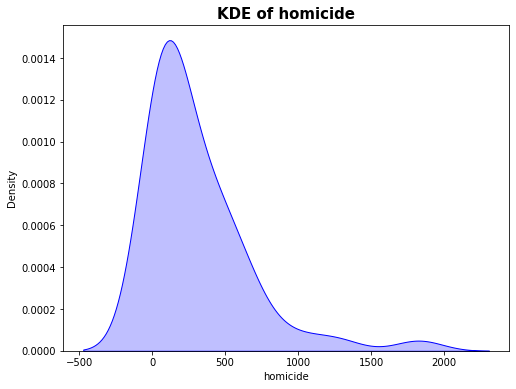

In [ ]:
### KDE of Homicide

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'homicide', color = 'blue', shade = True)

plt.title('KDE of homicide', fontsize = 15, fontweight = 'bold')
plt.show()

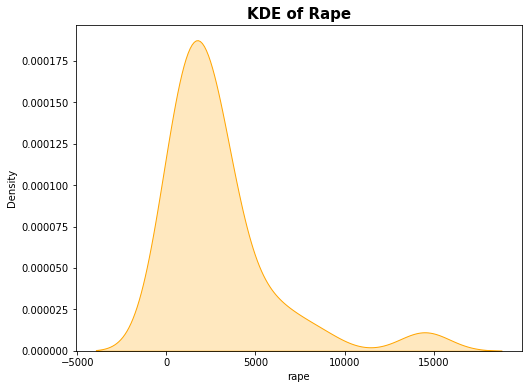

In [ ]:
### KDE of Rape

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'rape', color = 'orange', shade = True)

plt.title('KDE of Rape', fontsize = 15, fontweight = 'bold')
plt.show()

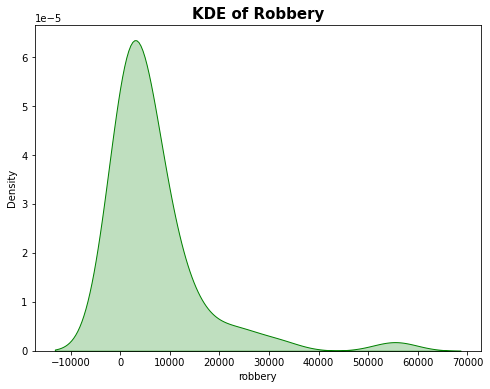

In [ ]:
### KDE of Robbery

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'robbery', color = 'green', shade = True)

plt.title('KDE of Robbery', fontsize = 15, fontweight = 'bold')
plt.show()

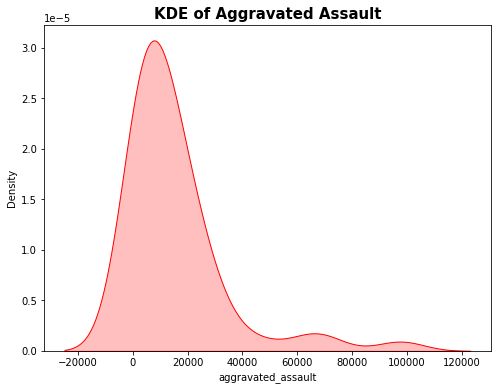

In [ ]:
### KDE of Aggravated Assault

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'aggravated_assault', color = 'red', shade = True)

plt.title('KDE of Aggravated Assault', fontsize = 15, fontweight = 'bold')
plt.show()

다음은 본격적으로 인구 수에 따른 각 범죄 발생률의 인과관계 여부를 분석하고자 한다.

독립변수는 오직 인구 수 하나이기 때문에 단순 회귀 분석 모델인 OLS로 진행하였다. 

(1) 살인죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): homicide

ols_model = ols('homicide ~ population', data = violent_crime)
homicide_fit = ols_model.fit()

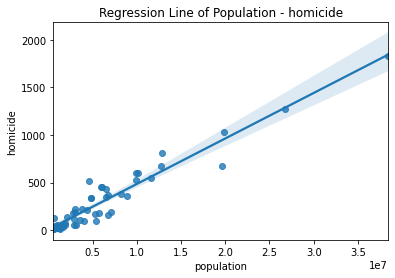

In [ ]:
### seaborn regplot: homicide

sns.regplot(x = violent_crime['population'], y = violent_crime['homicide'])
plt.title('Regression Line of Population - homicide')
plt.show()

In [ ]:
print(homicide_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               homicide   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     567.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.36e-28
Time:                        06:43:44   Log-Likelihood:                -306.47
No. Observations:                  51   AIC:                             616.9
Df Residuals:                      49   BIC:                             620.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2506     18.827      0.332      0.7

OLS 단일 회귀 모델 분석 결과, 살인죄 = 0.00004786 * 인구 수 + 6.2506 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 5건 가량 살인죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 살인죄가 0.00004786씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 92%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 2.429이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(2) 강간죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): rape

ols_model = ols('rape ~ population', data = violent_crime)
rape_fit = ols_model.fit()

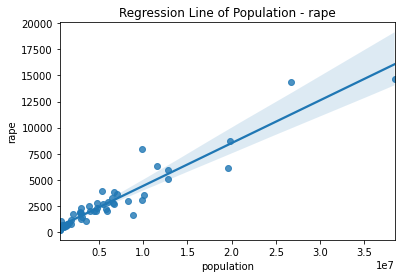

In [ ]:
### seaborn regplot: rape

sns.regplot(x = violent_crime['population'], y = violent_crime['rape'])
plt.title('Regression Line of Population - rape')
plt.show()

In [ ]:
print(rape_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   rape   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     438.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           4.31e-26
Time:                        06:43:44   Log-Likelihood:                -422.50
No. Observations:                  51   AIC:                             849.0
Df Residuals:                      49   BIC:                             852.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    333.2409    183.166      1.819      0.0

OLS 단일 회귀 모델 분석 결과, 강간죄 = 0.0004 * 인구 수 + 333.2409 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 40건 가량 강간죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 강간죄가 0.0004씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 강간죄의 분산을 인구 수가 약 90%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 2.013이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(3) 강도죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): robbery

ols_model = ols('robbery ~ population', data = violent_crime)
robbery_fit = ols_model.fit()

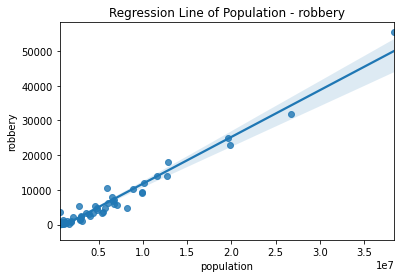

In [ ]:
### seaborn regplot: robbery

sns.regplot(x = violent_crime['population'], y = violent_crime['robbery'])
plt.title('Regression Line of Population - robbery')
plt.show()

In [ ]:
print(robbery_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                robbery   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1335.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           3.26e-37
Time:                        06:43:45   Log-Likelihood:                -454.77
No. Observations:                  51   AIC:                             913.5
Df Residuals:                      49   BIC:                             917.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1668.8308    344.916     -4.838      0.0

OLS 단일 회귀 모델 분석 결과, 강도죄 = 0.0013 * 인구 수 - 1668.8308 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 130건 가량 강도죄가 증가하고 있었다.<br>
절편 및 결정계수 모두 유의수준보다 작아 통계적으로 유의미했다.<br>
즉 인구 수가 증가할 때마다 강도죄가 0.0013씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 강도죄의 분산을 인구 수가 약 96%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 2.077이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(4) 가중 폭행죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): aggravated_assault

ols_model = ols('aggravated_assault ~ population', data = violent_crime)
aggravated_assault_fit = ols_model.fit()

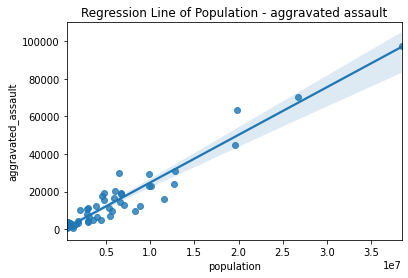

In [ ]:
### seaborn regplot: aggravated_assault

sns.regplot(x = violent_crime['population'], y = violent_crime['aggravated_assault'])
plt.title('Regression Line of Population - aggravated assault')
plt.show()

In [ ]:
print(aggravated_assault_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     aggravated_assault   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     607.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           2.90e-29
Time:                        06:43:45   Log-Likelihood:                -507.24
No. Observations:                  51   AIC:                             1018.
Df Residuals:                      49   BIC:                             1022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -589.2846    964.955     -0.611      0.5

OLS 단일 회귀 모델 분석 결과, 가중 폭행죄 = 0.0025 * 인구 수 - 589.2846 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 250건 가량 가중 폭행죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 가중 폭행죄가 0.0025씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 가중 폭행죄의 분산을 인구 수가 약 93%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 2.026이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

#### **property_crime**

재산범죄의 회귀분석에 앞서 10년 간 집계된 주거 침입 절도죄, 절도죄, 차량 절도죄의 데이터 분포를 확인하고자 한다.<br>


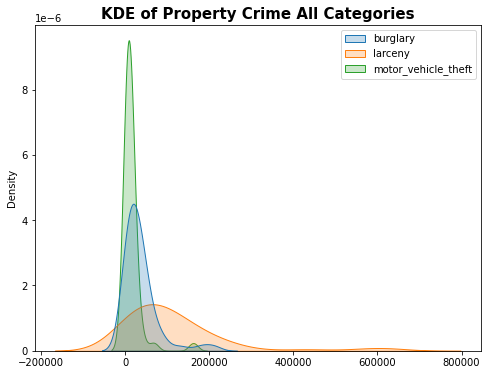

In [ ]:
### KDE of Property Crime All Categories

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime[['burglary',	'larceny',	'motor_vehicle_theft']], shade = True)

plt.title('KDE of Property Crime All Categories', fontsize = 15, fontweight = 'bold')
plt.show()

In [ ]:
property_crime.describe()

,population,burglary,larceny,motor_vehicle_theft
count,51.00,51.00,51.00,51.00
mean,6222248.67,35388.55,115303.28,14445.49
std,7071905.91,41604.52,128674.92,24072.81
min,574833.30,1860.10,8885.60,333.60
25%,1736264.40,7459.20,29185.80,4019.20
50%,4399583.10,24887.80,90657.40,9097.60
75%,6893872.50,42601.35,139775.40,15030.30
max,38435871.00,209665.60,621951.00,162028.40


재산범죄의 경우 압도적으로 가장 작은 표준편차를 보인 것은 차량 절도죄였다.<br>
차량 절도죄는 다른 재산범죄에 비해 평균으로 집중되어 인구 수에 따라 범죄 발생 변화 폭이 적은 편이었다.<br>


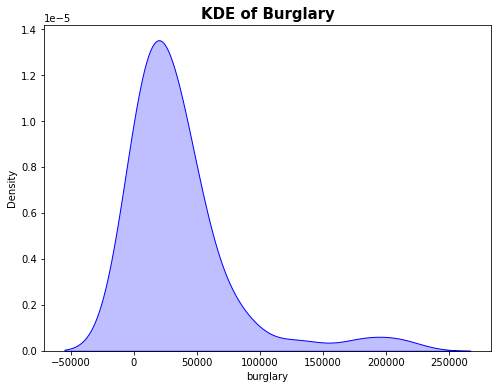

In [ ]:
### KDE of Burglary

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime, x = 'burglary', color = 'blue', shade = True)

plt.title('KDE of Burglary', fontsize = 15, fontweight = 'bold')
plt.show()

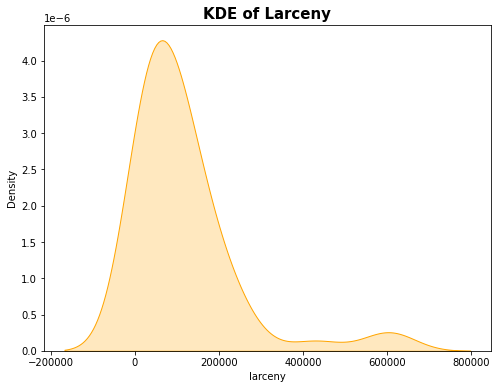

In [ ]:
### KDE of Larceny

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime, x = 'larceny', color = 'orange', shade = True)

plt.title('KDE of Larceny', fontsize = 15, fontweight = 'bold')
plt.show()

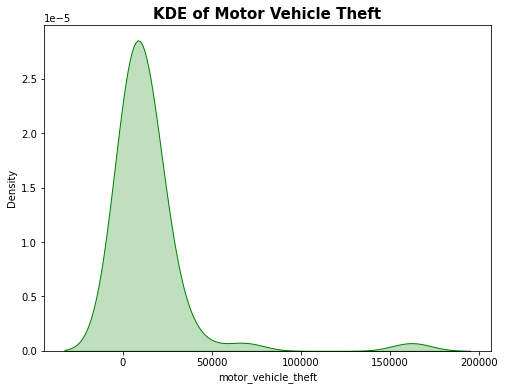

In [ ]:
### KDE of Motor Vehicle Theft

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime, x = 'motor_vehicle_theft', color = 'green', shade = True)

plt.title('KDE of Motor Vehicle Theft', fontsize = 15, fontweight = 'bold')
plt.show()

(1) 주거 침입 절도죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): burglary

ols_model2 = ols('burglary ~ population', data = property_crime)
burglary_fit = ols_model2.fit()

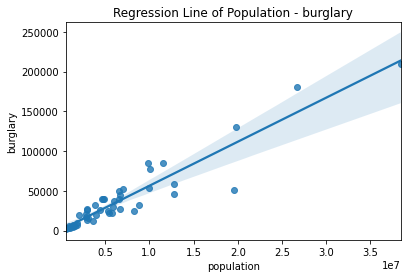

In [ ]:
### seaborn regplot: burglary 

sns.regplot(x = property_crime['population'], y = property_crime['burglary'])
plt.title('Regression Line of Population - burglary')
plt.show()

In [ ]:
print(burglary_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               burglary   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     383.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           8.29e-25
Time:                        06:43:46   Log-Likelihood:                -558.79
No. Observations:                  51   AIC:                             1122.
Df Residuals:                      49   BIC:                             1125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    920.8363   2651.255      0.347      0.7

OLS 단일 회귀 모델 분석 결과, 주거 침입 절도죄 = 0.0055 * 인구 수 + 920.8363 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 550건 가량 주거 침입 절도죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 주거 침입 절도죄가 0.0055씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 약 89%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 2.306이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(2) 절도죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): larceny

ols_model2 = ols('larceny ~ population', data = property_crime)
larceny_fit = ols_model2.fit()

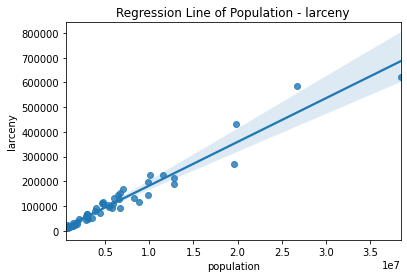

In [ ]:
### seaborn regplot: larceny 

sns.regplot(x = property_crime['population'], y = property_crime['larceny'])
plt.title('Regression Line of Population - larceny')
plt.show()

In [ ]:
print(larceny_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                larceny   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     876.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           6.35e-33
Time:                        06:43:46   Log-Likelihood:                -596.95
No. Observations:                  51   AIC:                             1198.
Df Residuals:                      49   BIC:                             1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5126.8770   5603.475      0.915      0.3

OLS 단일 회귀 모델 분석 결과, 절도죄 = 0.0177 * 인구 수 + 5126.8770 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 1770건 가량 절도죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 절도죄가 0.0177씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 약 95%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 1.830이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(3) 차량 절도죄

In [ ]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): motor_vehicle_theft

ols_model2 = ols('motor_vehicle_theft ~ population', data = property_crime)
motor_vehicle_theft_fit = ols_model2.fit()

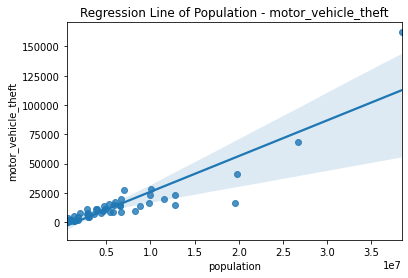

In [ ]:
### seaborn regplot: motor_vehicle_theft 

sns.regplot(x = property_crime['population'], y = property_crime['motor_vehicle_theft'])
plt.title('Regression Line of Population - motor_vehicle_theft')
plt.show()

In [ ]:
print(motor_vehicle_theft_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     motor_vehicle_theft   R-squared:                       0.801
Model:                             OLS   Adj. R-squared:                  0.797
Method:                  Least Squares   F-statistic:                     197.6
Date:                 Tue, 06 Jul 2021   Prob (F-statistic):           8.05e-19
Time:                         06:43:47   Log-Likelihood:                -545.18
No. Observations:                   51   AIC:                             1094.
Df Residuals:                       49   BIC:                             1098.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4514.5311   2030.459     -2.22

OLS 단일 회귀 모델 분석 결과, 차량 절도죄 = 0.0030 * 인구 수 - 4514.5311 식이 도출되었다.<br>
인구 10만 명씩 늘어날수록 약 300건 가량 차량 절도죄가 증가하고 있었다.<br>
절편 및 결정계수는 유의수준보다 작아 통계적으로 유의미했다.<br>
즉 인구 수가 증가할 때마다 차량 절도죄가 0.0030씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 약 80%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.
또한 DW 검정값이 2.015이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

### **2019년 인구 수를 통한 형법 범죄 발생 건수 예측**
- sklearn의 LinearRegression 적용

2009년부터 2018년 간 집계된 데이터를 단순 선형 회귀 모델을 통해 분석한 결과,<br>
인구 수는 강력범죄 및 재산범죄를 예측하는 데 유의미한 변수임을 파악할 수 있었다.<br>
따라서 2009년부터 2018년 간 데이터를 학습한 LinearRegression 모델을 바탕으로 2019년의 인구 수를 통해 각 범죄를 예측해보고자 한다.

In [ ]:
df_test.head()

,state_name,population,homicide,rape,robbery,aggravated_assault,burglary,larceny,motor_vehicle_theft
0,Alabama,4903185,358,2068.00,3941,18679,26079,92477,12577
1,Alaska,731545,69,1088.00,826,4360,3563,15114,2617
2,Arizona,7278717,365,3662.00,6410,22704,28699,130788,18151
3,Arkansas,3017804,242,2331.00,1557,13513,18095,60735,7420
4,California,39512223,1690,14799.00,52301,105541,152555,626802,141757


In [ ]:
df_test.describe()

,population,homicide,rape,robbery,aggravated_assault,burglary,larceny,motor_vehicle_theft
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,6436069.08,322.06,2741.47,5254.67,16101.61,21915.61,99727.37,14154.61
std,7360660.47,355.15,3082.43,8564.03,19392.77,26944.92,117333.95,21980.67
min,578759.00,11.00,278.00,67.00,824.00,1275.00,6984.00,298.00
25%,1789606.00,64.50,768.00,844.50,3960.50,5042.50,28139.50,3801.00
50%,4467673.00,198.00,2068.00,2991.00,10987.00,15510.00,65620.00,10269.00
75%,7446805.00,518.00,2919.50,5540.00,19629.50,27189.50,115252.00,16464.50
max,39512223.00,1690.00,14824.00,52301.00,105541.00,152555.00,626802.00,141757.00


#### **violent_2019**

In [ ]:
violent_2019 = df_test[['state_name',	'population',	'homicide',	'rape',	'robbery',	'aggravated_assault']]

In [ ]:
violent_2019.head()

,state_name,population,homicide,rape,robbery,aggravated_assault
0,Alabama,4903185,358,2068.00,3941,18679
1,Alaska,731545,69,1088.00,826,4360
2,Arizona,7278717,365,3662.00,6410,22704
3,Arkansas,3017804,242,2331.00,1557,13513
4,California,39512223,1690,14799.00,52301,105541


In [ ]:
violent_2019.shape

(51, 6)

(1) 살인죄

In [ ]:
### homicide

reg_model = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['homicide']

X_train = violent_crime[feature]
y_train = violent_crime[target]

reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model.coef_

array([[4.78634039e-05]])

In [ ]:
reg_model.intercept_

array([6.25062618])

In [ ]:
X_test = [[x] for x in violent_2019['population']]
y_pred = reg_model.predict(X_test)
y_test = violent_2019[target]

In [ ]:
reg_model.predict(X_test)

array([[ 240.93375015],
       [  41.26485998],
       [ 354.6347977 ],
       [ 150.69299787],
       [1897.4401139 ],
       [ 281.8833332 ],
       [ 176.89739782],
       [  52.8582858 ],
       [  40.03017561],
       [1034.24822668],
       [ 514.43663142],
       [  74.01907957],
       [  91.78564004],
       [ 612.76711262],
       [ 328.4775432 ],
       [ 157.26301587],
       [ 145.6917508 ],
       [ 220.08866339],
       [ 228.75773097],
       [  70.58918804],
       [ 295.61744976],
       [ 336.14928103],
       [ 484.25559628],
       [ 276.18261034],
       [ 148.69924778],
       [ 300.00882134],
       [  57.40597926],
       [  98.83797756],
       [ 153.67737683],
       [  71.33102294],
       [ 431.38247351],
       [ 106.61199948],
       [ 937.36427327],
       [ 508.24602662],
       [  42.72550747],
       [ 565.7307405 ],
       [ 195.64472731],
       [ 208.12587568],
       [ 618.99739618],
       [  56.95524958],
       [ 252.68560384],
       [  48.593

In [ ]:
r2_score(y_test, y_pred)

0.8640625274639059

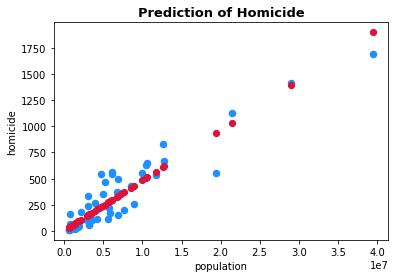

In [ ]:
### visualization: homicide

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('homicide')
plt.title('Prediction of Homicide', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 살인죄 예측은 약 86%의 정확도를 보였다.<br>
14% 가량은 인구 수만으로 예측하기엔 정확도가 떨어진 것이다.<br>

(2) 강간죄

In [ ]:
### rape

reg_model = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['rape']

X_train = violent_crime[feature]
y_train = violent_crime[target]

reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model.coef_

array([[0.00040938]])

In [ ]:
reg_model.intercept_

array([333.24092007])

In [ ]:
X_test = [[x] for x in violent_2019['population']]
y_pred = reg_model.predict(X_test)
y_test = violent_2019[target]

In [ ]:
reg_model.predict(X_test)

array([[ 2340.502791  ],
       [  632.72021473],
       [ 3312.99614109],
       [ 1568.66705699],
       [16508.72250262],
       [ 2690.74756066],
       [ 1792.7952004 ],
       [  731.87963113],
       [  622.15986932],
       [ 9125.7793525 ],
       [ 4679.79287668],
       [  912.86944311],
       [ 1064.8281303 ],
       [ 5520.82065212],
       [ 3089.27123616],
       [ 1624.86089996],
       [ 1525.89102612],
       [ 2162.21324411],
       [ 2236.36041117],
       [  883.53333083],
       [ 2808.21646103],
       [ 3154.88816918],
       [ 4421.65228258],
       [ 2641.98886241],
       [ 1551.61436711],
       [ 2845.77618234],
       [  770.77638485],
       [ 1125.1472873 ],
       [ 1594.19266782],
       [  889.87829879],
       [ 3969.42460829],
       [ 1191.63906364],
       [ 8297.12383475],
       [ 4626.84418249],
       [  645.21323927],
       [ 5118.51513172],
       [ 1953.14247644],
       [ 2059.89464855],
       [ 5574.10872165],
       [  766.92126108],


In [ ]:
r2_score(y_test, y_pred)

0.9076933614549448

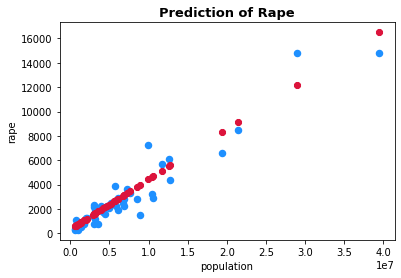

In [ ]:
### visualization: rape

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('rape')
plt.title('Prediction of Rape', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 강간죄 예측은 약 91%의 정확도를 보였다.<br>
9% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

(3) 강도죄

In [ ]:
### robbery

reg_model = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['robbery']

X_train = violent_crime[feature]
y_train = violent_crime[target]

reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model.coef_

array([[0.00134544]])

In [ ]:
reg_model.intercept_

array([-1668.83080611])

In [ ]:
X_test = [[x] for x in violent_2019['population']]
y_pred = reg_model.predict(X_test)
y_test = violent_2019[target]

In [ ]:
reg_model.predict(X_test)

array([[ 4928.09181955],
       [ -684.5836765 ],
       [ 8124.2185818 ],
       [ 2391.4319593 ],
       [51492.3446133 ],
       [ 6079.18111137],
       [ 3128.03540988],
       [ -358.69346403],
       [ -719.29054888],
       [27228.09418515],
       [12616.23451671],
       [  236.13464631],
       [  735.55114807],
       [15380.29596826],
       [ 7388.94038588],
       [ 2576.1146056 ],
       [ 2250.84733009],
       [ 4342.13820643],
       [ 4585.82495757],
       [  139.72068776],
       [ 6465.24595817],
       [ 7604.59228278],
       [11767.84818979],
       [ 5918.93427744],
       [ 2335.38781412],
       [ 6588.68703924],
       [ -230.85818831],
       [  933.79175503],
       [ 2475.32259764],
       [  160.57360352],
       [10281.58921198],
       [ 1152.31884911],
       [24504.69450663],
       [12442.21714321],
       [ -643.52499979],
       [14058.10755408],
       [ 3655.02124495],
       [ 4005.86526275],
       [15555.42870838],
       [ -243.52816107],


In [ ]:
r2_score(y_test, y_pred)

0.8458770140683446

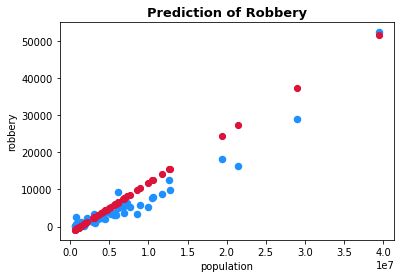

In [ ]:
### visualization: robbery

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('robbery')
plt.title('Prediction of Robbery', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 강도죄 예측은 약 85%의 정확도를 보였다.<br>
15% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

(4) 가중 폭행죄

In [ ]:
### aggravated_assault

reg_model = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['aggravated_assault']

X_train = violent_crime[feature]
y_train = violent_crime[target]

reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model.coef_

array([[0.0025385]])

In [ ]:
reg_model.intercept_

array([-589.28460767])

In [ ]:
X_test = [[x] for x in violent_2019['population']]
y_pred = reg_model.predict(X_test)
y_test = violent_2019[target]

In [ ]:
reg_model.predict(X_test)

array([[11857.43543409],
       [ 1267.74012481],
       [17887.71610966],
       [ 7071.40156446],
       [99712.37194997],
       [14029.24901617],
       [ 8461.18547606],
       [ 1882.61231132],
       [ 1202.25705815],
       [53931.88470769],
       [26363.01102179],
       [ 3004.90210952],
       [ 3947.17439835],
       [31578.09402607],
       [16500.43261752],
       [ 7419.85088327],
       [ 6806.15402084],
       [10751.88956159],
       [11211.66466302],
       [ 2822.99341993],
       [14757.65547761],
       [16907.31305854],
       [24762.32117022],
       [13726.90387849],
       [ 6965.66047508],
       [14990.55749342],
       [ 2123.80505808],
       [ 4321.20415066],
       [ 7229.68192468],
       [ 2862.33758376],
       [21958.12738835],
       [ 4733.5093596 ],
       [48793.52015745],
       [26034.6843681 ],
       [ 1345.20743545],
       [29083.45979013],
       [ 9455.47410536],
       [10117.42779432],
       [31908.52509371],
       [ 2099.90003255],


In [ ]:
r2_score(y_test, y_pred)

0.934542813116817

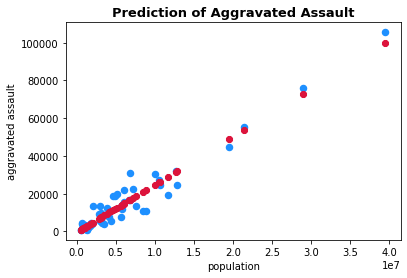

In [ ]:
### visualization: aggravated_assault

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('aggravated assault')
plt.title('Prediction of Aggravated Assault', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 가중 폭행죄 예측은 약 93%의 정확도를 보였다.<br>
7% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### **property_2019**

In [ ]:
property_2019 = df_test[['state_name',	'population', 'burglary',	'larceny',	'motor_vehicle_theft']]

In [ ]:
property_2019.head()

,state_name,population,burglary,larceny,motor_vehicle_theft
0,Alabama,4903185,26079,92477,12577
1,Alaska,731545,3563,15114,2617
2,Arizona,7278717,28699,130788,18151
3,Arkansas,3017804,18095,60735,7420
4,California,39512223,152555,626802,141757


In [ ]:
property_2019.shape

(51, 5)

(1) 주거 침입 절도죄

In [ ]:
### burglary

reg_model2 = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['burglary']

X_train = property_crime[feature]
y_train = property_crime[target]

reg_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model2.coef_

array([[0.00553943]])

In [ ]:
reg_model2.intercept_

array([920.83628245])

In [ ]:
X_test = [[x] for x in property_2019['population']]
y_pred = reg_model2.predict(X_test)
y_test = property_2019[target]

In [ ]:
reg_model2.predict(X_test)

array([[ 28081.69239947],
       [  4973.17950183],
       [ 41240.78854888],
       [ 17637.75400702],
       [219796.07834785],
       [ 32820.958328  ],
       [ 20670.49843529],
       [  6314.93499501],
       [  4830.28433382],
       [119895.28337676],
       [ 59735.32083412],
       [  8763.96185738],
       [ 10820.15995406],
       [ 71115.51727482],
       [ 38213.50046038],
       [ 18398.12957428],
       [ 17058.93883777],
       [ 25669.20362549],
       [ 26672.51094936],
       [  8367.00621542],
       [ 34410.46488295],
       [ 39101.3826557 ],
       [ 56242.34384095],
       [ 32161.18991074],
       [ 17407.00899913],
       [ 34918.69661947],
       [  6841.25851393],
       [ 11636.35636983],
       [ 17983.1486231 ],
       [  8452.86186006],
       [ 50123.11696205],
       [ 12536.07632968],
       [108682.4996267 ],
       [ 59018.85633823],
       [  5142.22632469],
       [ 65671.80187674],
       [ 22840.20501731],
       [ 24284.70034151],
       [ 718

In [ ]:
r2_score(y_test, y_pred)

0.23728308054912428

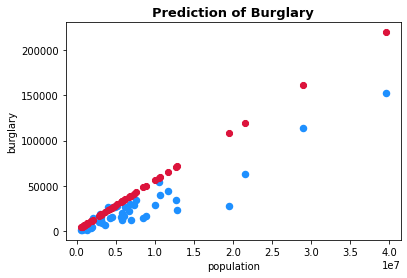

In [ ]:
### visualization

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('burglary')
plt.title('Prediction of Burglary', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 주거 침입 절도죄 예측은 약 24%라는 현저히 낮은 정확도를 보였다.<br>
주거 침입 절도죄의 76% 가량은 인구 수만으로 예측하기엔 정확도가 상당히 떨어졌다.

(2) 절도죄

In [ ]:
### larceny

reg_model2 = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['larceny']

X_train = property_crime[feature]
y_train = property_crime[target]

reg_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model2.coef_

array([[0.01770685]])

In [ ]:
reg_model2.intercept_

array([5126.87704969])

In [ ]:
X_test = [[x] for x in property_2019['population']]
y_pred = reg_model2.predict(X_test)
y_test = property_2019[target]

In [ ]:
reg_model2.predict(X_test)

array([[ 91946.82370661],
       [ 18080.23244565],
       [134010.00539807],
       [ 58562.67078398],
       [704763.76473727],
       [107095.9343729 ],
       [ 68256.86850558],
       [ 22369.16722158],
       [ 17623.46662018],
       [385429.88023056],
       [193127.96175157],
       [ 30197.50593949],
       [ 36770.16360169],
       [229504.8728353 ],
       [124333.24892078],
       [ 60993.21884566],
       [ 56712.4823399 ],
       [ 84235.27935158],
       [ 87442.36118888],
       [ 28928.63328275],
       [112176.80788135],
       [127171.37318693],
       [181962.62605984],
       [104986.97806662],
       [ 57825.09207178],
       [113801.37568083],
       [ 24051.56558339],
       [ 39379.14356069],
       [ 59666.72810875],
       [ 29203.07170456],
       [162402.4564938 ],
       [ 42255.10735891],
       [349588.10547717],
       [190837.77586614],
       [ 18620.59229586],
       [212103.98243475],
       [ 75192.35716986],
       [ 79809.70083728],
       [2318

In [ ]:
r2_score(y_test, y_pred)

0.9161365636076509

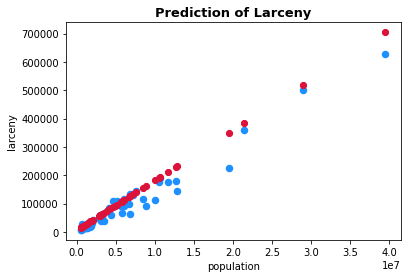

In [ ]:
### visualization

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('larceny')
plt.title('Prediction of Larceny', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 절도죄 예측은 약 92%의 정확도를 보였다.<br>
8% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

(3) 차량 절도죄

In [ ]:
### motor_vehicle_theft

reg_model2 = LinearRegression(n_jobs = -1)

feature = ['population']
target = ['motor_vehicle_theft']

X_train = property_crime[feature]
y_train = property_crime[target]

reg_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
reg_model2.coef_

array([[0.00304713]])

In [ ]:
reg_model2.intercept_

array([-4514.53107952])

In [ ]:
X_test = [[x] for x in property_2019['population']]
y_pred = reg_model2.predict(X_test)
y_test = property_2019[target]

In [ ]:
reg_model2.predict(X_test)

array([[ 10426.13041421],
       [ -2285.41547151],
       [ 17664.69462901],
       [  4681.12195385],
       [115884.50520153],
       [ 13033.10891525],
       [  6349.37599211],
       [ -1547.34173243],
       [ -2364.01933898],
       [ 60931.01057724],
       [ 27838.17904232],
       [  -200.17943452],
       [   930.89535907],
       [ 34098.20494209],
       [ 15999.44201769],
       [  5099.38984311],
       [  4362.72692705],
       [  9099.06701186],
       [  9650.96696065],
       [  -418.53705363],
       [ 13907.4657204 ],
       [ 16487.84883629],
       [ 25916.7599738 ],
       [ 12670.18307286],
       [  4554.19358902],
       [ 14187.03416637],
       [ -1257.82134698],
       [  1379.86921718],
       [  4871.11685012],
       [  -371.30952449],
       [ 22550.69165081],
       [  1874.78776104],
       [ 54763.07515981],
       [ 27444.06578391],
       [ -2192.42608465],
       [ 31103.72241619],
       [  7542.88960755],
       [  8337.47854006],
       [ 344

In [ ]:
r2_score(y_test, y_pred)

0.793211521004604

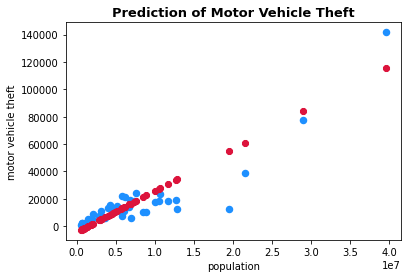

In [ ]:
### visualization

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('motor vehicle theft')
plt.title('Prediction of Motor Vehicle Theft', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 차량 절도죄 예측은 약 79%의 정확도를 보였다.<br>
21% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

### **5. 정리**<br> 

적은 예산 확보 속에서 오직 인구 수만으로 2019년 범죄 발생을 예측해본 결과는 다음과 같다.<br>
- 90% 이상의 높은 정확도를 보인 범죄<br>
 1. aggravated assault(가중 폭행죄): 93%
 2. larceny(절도죄): 92%
 3. rape(강간죄): 91%<br>
 <br>
- 80% 이상의 정확도를 보인 범죄<br>
 1. homicide(살인죄): 86%
 2. robbery(강도죄): 85%<br>
<br>
- 70% 이상 80% 미만의 정확도를 보인 범죄<br>
 1. motor vehicle theft(차량 절도죄): 79%<br>
<br>
- 50%의 정확도에도 미치지 못한 범죄<br>
 1. burglary(주거 침입 절도죄): 24%<br>
<br>

인구 수는 형사 범죄 중 특히 강력 범죄를 예측하는 데 있어 탁월한 편이었다.<br>
가중 폭행죄뿐만 아니라 심지어 강간죄에서도 91%라는 높은 예측도를 보였기 때문이다.<br>
다소 놀라운 점은 비교적 범죄 성립 요건이 까다롭지 않은 절도죄를 제외한 재산범죄에서는 정확도가 높지 않았다는 것에 있다.<br>
<br>
다시 말해 인구 수의 규모만으로도 단순 재산범죄인 절도죄와 강력범죄인 가중 폭행죄, 강간죄, 살인죄 및 강도죄가 발생되는 데에 큰 영향을 미치고 있었다.<br>
물론 차량 절도죄 역시 인구 수가 많아질수록 범죄 발발의 79%가 예측 가능할 정도로 영향을 받고 있었다.<br>
다만 주거 침입 절도죄의 경우 인구 수만으로는 범죄 발생을 예측할 수 없었다.<br>
주거 침입 절도죄는 인구 수뿐만 아니라 다른 요인들에 의해 범죄가 유발되는 모양이었다.<br>  


이를 바탕으로 본 부서는 인구 수를 통해 강력범죄 및 절도죄 발생을 높은 수준으로 예견하여<br>
각 도시의 인구 규모에 맞는 부서 인원 배치 및 자원을 활용해 범죄 예방에 탁월한 업무 능력을 보여줄 수 있었다.<br>
그 결과 정부로부터 더 많은 차기 예산안을 약속 받을 수 있었다.    